In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

%matplotlib inline


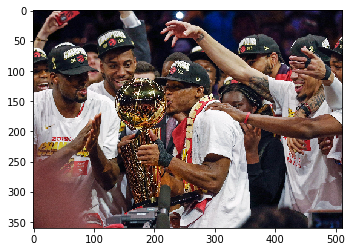

In [15]:
img = cv2.imread('raptors.jpg')
img = cv2.resize(img, None, fx=0.2, fy=0.2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert to rgb image
plt.imshow(img)
img = img.astype(float) # convert from unsigned int to float to make distance calculations correct

In [3]:
def get_distance(p1, p2): # takes 2 rgb values and finds the l2 norm of their difference
    return np.linalg.norm(p2-p1)

def initialize_means(img, k):
    '''
    Initializes the means of the clusters using the furthest-first heuristic
    @param img: the original image
    @param k: the number of clusters
    Returns:
        mu: the initialized means of the clusters
    '''
    height, width, _ = img.shape # get the height and width of the image
    mu = [0] * k
    mu[0] = img[0][0] # initialize the first mean to be the first pixel of the image
    
    max_distance = 0

    for i in range(height): # get the second mean
        for j in range(width):
            current_distance = get_distance(mu[0], img[i][j])
            if current_distance > max_distance:
                max_distance = current_distance
                mu[1] = img[i][j]              

    for current in range(2, k): # get the rest of the means
        max_distance = 0
        for i in range(height): # for each point
            for j in range(width):
                min_dist_to_previous_means = math.inf
                for previous in range(current): # get the smallest distance to the previous means
                    current_distance = get_distance(mu[previous], img[i][j])
                    min_dist_to_previous_means = min(min_dist_to_previous_means, current_distance)
                    
                if min_dist_to_previous_means > max_distance: # find the point that maximizes that smallest distance
                    max_distance = min_dist_to_previous_means
                    mu[current] = img[i][j]
    return mu


In [4]:
def k_means(mu, img, n_iterations=10):
    '''
    @param mu: initialized means
    @param img: the original image to segment on
    Returns:
        clusters: the rgb pixel values assigned to each cluster
        points: the x, y coordinate of the points assigned to each cluster in the image
        errors: the error while training, computed after every iteration
        mu: the final means after training
    '''
    errors = [] # list of the errors
    mu = list(mu)
    height, width, _ = img.shape
    for it in range(n_iterations):
        classifications = [[] for i in range(len(mu))]
        points = [[] for i in range(len(mu))]
        for i in range(height):
            for j in range(width):
                pixel = img[i][j]
                min_dist = math.inf
                cluster = 0
                for cluster_index, mean in enumerate(mu): # assign the points to a cluster
                    current_distance = get_distance(mean, pixel)
                    if current_distance < min_dist:
                        min_dist = current_distance
                        cluster =  cluster_index
                classifications[cluster].append(pixel)
                points[cluster].append((i, j))
        for i in range(len(classifications)):
            mu[i] = np.average(classifications[i], axis=0) # update the means
            
        total_error = 0
        for i in range(len(classifications)):
            mean = mu[i]
            for point in classifications[i]:
                total_error += get_distance(mean, point)**2 # calculate the error based on the objective function
        errors.append(total_error)
    return classifications, points, errors, mu
                

In [5]:
# # plotting for part b
# iterations = [i+1 for i in range(10)]
# plt.plot(iterations, errors)
# plt.xlabel('iterations')
# plt.ylabel('error (*1e8)')

[array([20., 22., 45.]), array([255., 255., 255.]), array([216., 192.,   6.]), array([113., 143., 171.]), array([195.,  16.,  20.]), array([255., 124., 137.]), array([114., 115.,  47.]), array([244., 232., 110.]), array([ 40.,  69., 139.]), array([202., 189., 196.]), array([174., 166., 101.]), array([102.,  29.,   0.]), array([193.,  75.,  91.]), array([181., 110.,   0.]), array([83., 50., 79.]), array([255., 248., 182.])]
[array([17.33243076, 12.94280557, 20.71761437]), array([235.27471209, 234.38475688, 235.10300704]), array([195.42030697, 157.12750885,  45.27626919]), array([145.67037087, 138.94845361, 145.81055027]), array([166.6280543 ,  35.6918552 ,  41.23348416]), array([206.86623691,  70.73730862,  78.74294923]), array([113.88778132,  66.89019628,  55.69186106]), array([199.85001058, 175.33911572, 149.50031733]), array([32.93763075, 34.30419718, 49.83021705]), array([178.26584287, 177.58712164, 182.57317764]), array([173.08536994, 131.41948443, 105.37445598]), array([73.6884147

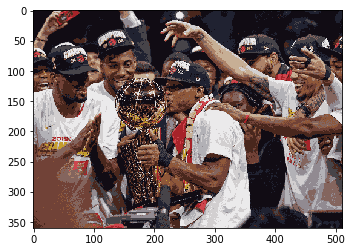

In [18]:
def compress(points, mu, img):
    '''
    Compresses the image based on the means and the clusters
    @param points: the (x, y) coordinate of the points in each cluster
    @param mu: the rgb values of the cluster means
    @param img: the original image
    '''
    for index, classes in enumerate(points): # set the rgb value of each pixel to its corresponding cluster value
        for point in classes:
            x, y = point
            img[x][y] = mu[index]
    img = img.astype(np.uint8) # convert the image back to unsigned ints
    return img

def k_means_driver(img, k): # run the k-means algorithm
    mu = initialize_means(img, k)
    print(mu)
    clusters, points, errors, mu = k_means(mu, img)
    print(mu)
    compressed = img.copy()
    compressed = compress(points, mu, compressed)
    plt.imshow(compressed)
    plt.show()

# for k in [4,8]:
#     k_means_driver(img, k)
k_means_driver(img, 16)